In [1]:
import numpy as np
import math
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score

dataset1 = np.genfromtxt('quake.csv', delimiter=',')
dataset2 = np.genfromtxt('penguins.csv', delimiter=',')







# Implementação K-medias

In [2]:
from scipy.spatial.distance import mahalanobis

def dist_eucl(a1, a2):
  return math.sqrt(np.sum((a1 - a2)**2))

class KMedias:
  def __init__(self):
    self.grupos = []
    self.centroides = []
    self.indices = []
    self.k = 0

  def k_medias(self,dataset, K, distance = "euclidian"):
    matriz_covariancia = np.cov(dataset, rowvar=False)
    self.k = K
    min_dataset = np.min(dataset, axis = 0)
    max_dataset = np.max(dataset, axis = 0)
    n,m = dataset.shape

    X = np.random.uniform(min_dataset[0], max_dataset[0], K)
    Y = np.random.uniform(min_dataset[1], max_dataset[1], K)

    centroides = np.column_stack((X, Y))
    ultimos_indices = np.zeros(n)
    contador = 0
    grupos = []
    while 1:
      contador += 1
      matriz_distancias = []
      for centroide in centroides:
        lista_distancias = []
        for coordenada in dataset:
            if distance == "euclidian":
                lista_distancias.append( dist_eucl(centroide, coordenada) )
            else:
                lista_distancias.append( mahalanobis(centroide, coordenada, matriz_covariancia))
        matriz_distancias.append(lista_distancias)
      matriz = np.array(matriz_distancias).T
      indices_menores = np.argmin(matriz, axis=1)

      if np.array_equal(ultimos_indices, indices_menores):
        self.grupos = grupos
        self.centroides = centroides
        self.indices = indices_menores
        return (indices_menores, centroides)
      ultimos_indices = indices_menores

      grupos = []
      for i in range(K):
        grupo = dataset[indices_menores == i]
        grupos.append(grupo)
        if len(grupo) != 0:
          nova_coordenada = np.mean(grupo, axis = 0)
          centroides[i] = nova_coordenada

  def espalhamento_intra(self, i):
    grupo = self.grupos[i]
    centroide = self.centroides[i]
    N = grupo.shape[0]
    return np.sum( np.linalg.norm( ( grupo - centroide )**2 , axis = 1)) / N

  def indice_davies(self):
    maximo = -99999
    for i in range(self.k):
      for j in range(self.k):
        if i!=j:
          maximo = max( maximo,  (self.espalhamento_intra(i) + self.espalhamento_intra(j)) / np.linalg.norm(self.centroides[i] - self.centroides[j]) )
    return maximo / self.k




# Testado o K-medias

## Distancia Euclidiana

Distancia Euclidiana
4 grupos, indice DB: 0.6567173756395661
----------------------------------
5 grupos, indice DB: 0.5229366386263017
----------------------------------
6 grupos, indice DB: 0.5502776092107097
----------------------------------
7 grupos, indice DB: 0.6516842734312794
----------------------------------
8 grupos, indice DB: 0.7018222566525185
----------------------------------
9 grupos, indice DB: 0.5726874362747301
----------------------------------
10 grupos, indice DB: 0.6366085759419537
----------------------------------
11 grupos, indice DB: 0.6247526730365675
----------------------------------
12 grupos, indice DB: 0.621693579815635
----------------------------------
13 grupos, indice DB: 0.625662077393984
----------------------------------
14 grupos, indice DB: 0.6106819069552171
----------------------------------
15 grupos, indice DB: 0.5801971712998467
----------------------------------
16 grupos, indice DB: 0.6259355000129946
----------------------------------

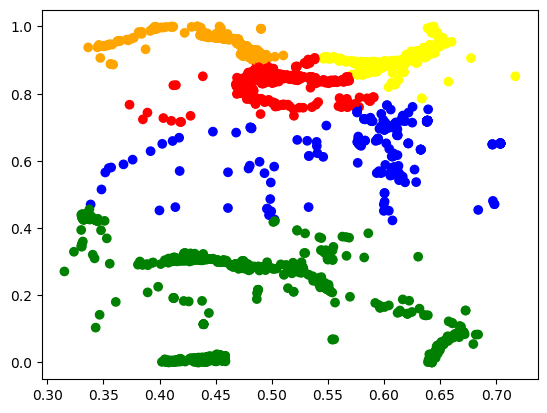

In [3]:
minimo = np.min(dataset1)
maximo = np.max(dataset1)
dataset1_norm = (dataset1 - minimo) / (maximo - minimo)

cores = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'brown', 'gray', 'lime', 'teal', 'navy', 'olive', 'maroon', 'aquamarine', 'indigo', 'gold', 'silver']

print("Distancia Euclidiana")
modelo = KMedias()
minimo_global = 99999
for i in range(4,21):
  minimo_atual = 99999
  for _ in range(5): # Diminuí para 5 pois estava demorando demais
    grupos_pred, centroides_finais = modelo.k_medias(dataset1_norm, i, distance = "euclidian")
    score = davies_bouldin_score(dataset1, modelo.indices)
    minimo_atual = min(minimo_atual, score)
  if minimo_atual < minimo_global:
    minimo_global = minimo_atual
    melhor_grupo = grupos_pred
    melhor_centroides = centroides_finais
    n_grupos = i
  print(i,"grupos, indice DB:", minimo_atual)
  print("----------------------------------")
    
def cores_func(x):
    return cores[x]

array_cores = np.vectorize(cores_func)(melhor_grupo)
    
print("Numero de grupos:",n_grupos)
x1 = dataset1_norm[:, 0]
x2 = dataset1_norm[:, 1]
plt.scatter(x1, x2, c = array_cores)
plt.show()


## Distancia de Mahalanobis

Distancia de Mahalanobis
4 grupos, indice DB: 0.727887106815546
----------------------------------
5 grupos, indice DB: 0.8581283105382853
----------------------------------
6 grupos, indice DB: 0.9395612229132474
----------------------------------
7 grupos, indice DB: 0.8376010329478444
----------------------------------
8 grupos, indice DB: 0.9764108148592241
----------------------------------
9 grupos, indice DB: 1.0361667509841623
----------------------------------
10 grupos, indice DB: 1.0852802971015603
----------------------------------
11 grupos, indice DB: 0.8994091567356879
----------------------------------
12 grupos, indice DB: 1.0157931130224032
----------------------------------
13 grupos, indice DB: 1.2453836805467757
----------------------------------
14 grupos, indice DB: 0.8958786785313141
----------------------------------
15 grupos, indice DB: 0.9271828526183954
----------------------------------
16 grupos, indice DB: 1.064942009985674
------------------------------

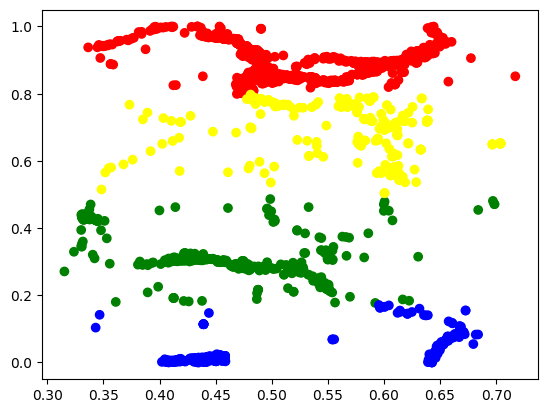

In [4]:
print("Distancia de Mahalanobis")
modelo = KMedias()
minimo_global = 99999
for i in range(4,21):
  minimo_atual = 99999
  for _ in range(5): # Diminuí para 5 pois estava demorando demais
    grupos_pred, centroides_finais = modelo.k_medias(dataset1_norm, i, distance = "mahalanobis")
    score = davies_bouldin_score(dataset1, modelo.indices)
    minimo_atual = min(minimo_atual, score)
  if minimo_atual < minimo_global:
    minimo_global = minimo_atual
    melhor_grupo = grupos_pred
    melhor_centroides = centroides_finais
    n_grupos = i
  print(i,"grupos, indice DB:", minimo_atual)
  print("----------------------------------")

array_cores = np.vectorize(cores_func)(melhor_grupo)

print("Numero de grupos:",n_grupos)
x1 = dataset1_norm[:, 0]
x2 = dataset1_norm[:, 1]
plt.scatter(x1, x2, c = array_cores)
plt.show()

# PCA

In [5]:
def PCA_(X, n):
  mean = np.mean(X, axis=0)
  X_centered = X - mean
  covariance_matrix = np.cov(X_centered, rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]

  selected_eigenvectors = eigenvectors[:, :n]
  variancia_explicada = np.sum(eigenvalues[:n])

  X_pca = np.dot(X_centered, selected_eigenvectors)
  return X_pca, variancia_explicada



## Plot para 2 dimensões

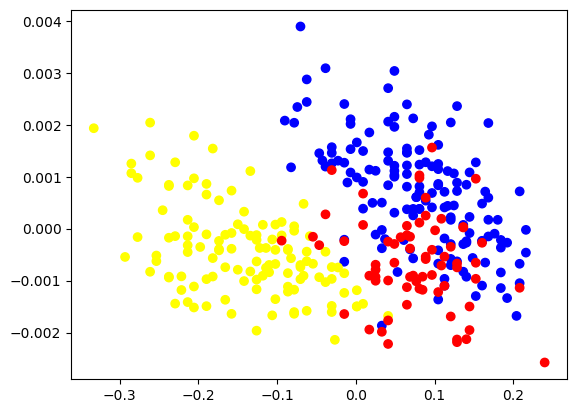

In [6]:
X = dataset2[:,:-1]
y = dataset2[:,-1].astype(int)

valor_minimo = np.min(X)
valor_maximo = np.max(X)
X_norm = (X - valor_minimo) / (valor_maximo - valor_minimo)
novoX, variancia_explicada = PCA_(X_norm, 2)

def func_cores(x):
    if x == 0: 
        return "blue"
    elif x == 1:
        return "red"
    return "yellow"

array_cores = np.vectorize(func_cores)(y)

x1 = novoX[:, 0]
x2 = novoX[:, 1]
plt.scatter(x1, x2, c = array_cores)
plt.show()


In [7]:
print("Variância explicada")
for i in range(1,5):
  novoX, variancia_explicada = PCA_(X_norm, i)
  print(i,"dimensão:",variancia_explicada)


Variância explicada
1 dimensão: 0.01640813739715859
2 dimensão: 0.01640942103205345
3 dimensão: 0.016409829759094288
4 dimensão: 0.016409889489921448
